# CWE

**Common Weakness Enumeration (CWE™)** is a formal list or dictionary of common software and hardware weaknesses that can occur in architecture, design, code, or implementation that can lead to exploitable security vulnerabilities. CWE was created to serve as a common language for describing security weaknesses; serve as a standard measuring stick for security tools targeting these weaknesses; and to provide a common baseline standard for weakness identification, mitigation, and prevention efforts. “Weaknesses” are flaws, faults, bugs, and other errors in software and hardware design, architecture, code, or implementation that if left unaddressed could result in systems and networks, and hardware being vulnerable to attack

> source: [cwe.mitre.org](https://cwe.mitre.org/about/faq.html#what_is_cwe_weakness_meaning)

You can see this notebook directly via:
- [GitHub](https://github.com/LimberDuck/limberduck_org_julio_7/blob/main/docs/notebooks/cwe/cwe.ipynb)
- [Jupyter nbviewer](https://nbviewer.org/github/LimberDuck/limberduck_org_julio_7/blob/main/docs/notebooks/cwe/cwe.ipynb)

## Generation time

In [1]:
from datetime import datetime, timezone, timedelta

timezone_offset = 0.0
tzinfo = timezone(timedelta(hours=timezone_offset))
generation_time = datetime.now(tzinfo).strftime('%Y-%m-%d %H:%M:%S %z')
print(generation_time)

2025-04-05 18:23:26 +0000


## Creative Commons

This notebook and generated diagrams are released with [Creative Commons liecense (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/deed.en).

<a href="https://creativecommons.org/licenses/by/4.0/deed.en"><img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by.png" alt="CC BY 4.0" width="100px"/></a>

In [2]:
import requests
import urllib3

urllib3.disable_warnings()

urls = ['https://mirrors.creativecommons.org/presskit/icons/cc.xlarge.png',
       'https://mirrors.creativecommons.org/presskit/icons/by.xlarge.png']
for url in urls:
    file_name = url.split("/")[-1:][0]
    print(file_name)

    file = requests.get(url, verify=False)
    open(file_name, 'wb').write(file.content)

cc.xlarge.png
by.xlarge.png


## CWE data downloading

All CWE IDs are taken from [cwe.mitre.org/data/downloads.html](https://cwe.mitre.org/data/downloads.html)

In [3]:
url = 'https://cwe.mitre.org/data/xml/cwec_latest.xml.zip'
file_name = url.split("/")[-1:][0]
print(file_name)

cwec_latest.xml.zip


In [4]:
import requests
import urllib3

urllib3.disable_warnings()

file = requests.get(url, verify=False)
open(file_name, 'wb').write(file.content)

1779050

In [5]:
import zipfile

with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
import glob

file_name = glob.glob('*.xml')[-1]
print(file_name)

cwec_v4.17.xml


## CWE data parsing

In [7]:
import pandas as pd 
import xml.etree.ElementTree as et 

tree = et.parse(file_name)
root = tree.getroot()
df_cols = ["number", "year"]
rows = []

if root.findall('{http://cwe.mitre.org/cwe-7}Weaknesses'):
    weeknesses = root.find('{http://cwe.mitre.org/cwe-7}Weaknesses')
    for weekness in weeknesses:
        weekness_id = weekness.get("ID")
        weekness_content_history = weekness.find("{http://cwe.mitre.org/cwe-7}Content_History")
        weekness_content_submission = weekness_content_history.find("{http://cwe.mitre.org/cwe-7}Submission")
        weekness_content_submission_date = weekness_content_submission.find("{http://cwe.mitre.org/cwe-7}Submission_Date").text
        weekness_content_submission_year = weekness_content_submission_date[0:4]
        
        rows.append({"number": weekness_id, "year": weekness_content_submission_year})

df = pd.DataFrame(rows, columns = df_cols)

print(df)

    number  year
0     1004  2017
1     1007  2017
2      102  2006
3     1021  2017
4     1022  2017
..     ...   ...
963     95  2006
964     96  2006
965     97  2006
966     98  2006
967     99  2006

[968 rows x 2 columns]


In [8]:
df = df.groupby(['year'], as_index=False)[['number']].count()
df.reset_index(drop=True, inplace=True)
df.index += 1

df.style.bar(subset=['number'], color='#FF6200')

,year,number
1,2006,533
2,2007,27
3,2008,67
4,2009,44
5,2010,20
6,2011,11
7,2012,5
8,2013,14
9,2014,5
10,2017,4


## CWE data saving

CSV file is available in GitHub repository, see:

- [file via GitHub](https://github.com/LimberDuck/limberduck_org_julio_7/blob/main/docs/notebooks/cwe/cwe-number-of-entries.csv)
- [file directly](https://raw.githubusercontent.com/LimberDuck/limberduck_org_julio_7/main/docs/notebooks/cwe/cwe-number-of-entries.csv)

In [9]:
csv_filename = 'cwe-number-of-entries.csv'

df.to_csv(csv_filename, index=False)

## CWE data ploting

PNG files are available in GitHub repository with two background versions, see: 

- [file via GitHub (white background)](https://github.com/LimberDuck/limberduck_org_julio_7/blob/main/docs/notebooks/cwe/cwe-number-of-entries-bg-white.png)
- [file via GitHub (transparent background)](https://github.com/LimberDuck/limberduck_org_julio_7/blob/main/docs/notebooks/cwe/cwe-number-of-entries-bg-transparent.png)
- [file directly (white background)](https://raw.githubusercontent.com/LimberDuck/limberduck_org_julio_7/main/docs/notebooks/cwe/cwe-number-of-entries-bg-white.png)
- [file directly (transparent background)](https://raw.githubusercontent.com/LimberDuck/limberduck_org_julio_7/main/docs/notebooks/cwe/cwe-number-of-entries-bg-transparent.png)

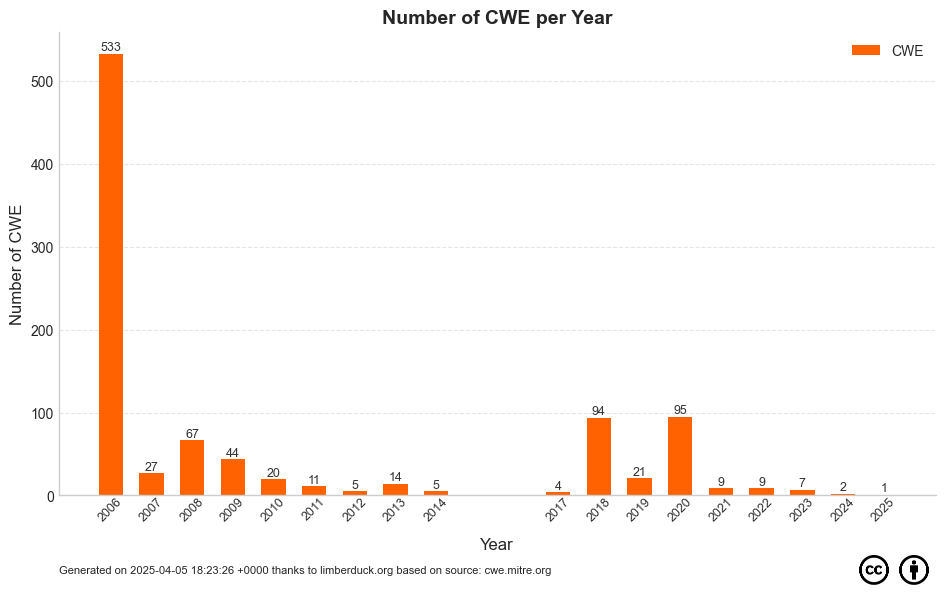

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

df = pd.read_csv(csv_filename)

# Set style and colors
plt.style.use('seaborn-v0_8-whitegrid')
bar_color = '#FF6200'

# Create figure and axes
fig, ax = plt.subplots()

bars = ax.bar(df['year'], df['number'], color=bar_color, width=0.6)

# Add value labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center', va='bottom',
            fontsize=9, fontweight='light', color='#333333')

# Disable default x-axis ticks
ax.set_xticks([])

# Add labels below bars
for bar, label in zip(bars, df['year']):
    ax.text(bar.get_x() + bar.get_width() / 2,
            0,
            str(label),
            ha='center', va='top',
            rotation=45,
            fontsize=9, color='#333333')

# Labels and title
ax.set_xlabel('Year', fontsize=12, labelpad=30)
ax.set_ylabel('Number of CWE', fontsize=12)
ax.set_title('Number of CWE per Year', fontsize=14, fontweight='bold')

# Tweak spines and grid
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Format Y-axis with thousands separator
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Adjust layout for rotated labels
plt.subplots_adjust(bottom=0.15)
plt.tight_layout()

# Legend and footer
plt.legend(['CWE'])
plt.figtext(0.10, 0.02,
            f"Generated on {generation_time} thanks to limberduck.org based on source: cwe.mitre.org",
            ha="left", fontsize=8)

# Figure background
fig.set_size_inches(10, 6)
fig.patch.set_facecolor('white')

# License icons
img_cc = plt.imread('cc.xlarge.png')
newax_cc = fig.add_axes([0.88, 0.0, 0.05, 0.05], anchor='NE', zorder=-1)
newax_cc.imshow(img_cc)
newax_cc.axis('off')

img_by = plt.imread('by.xlarge.png')
newax_by = fig.add_axes([0.92, 0.0, 0.05, 0.05], anchor='NE', zorder=-1)
newax_by.imshow(img_by)
newax_by.axis('off')

# Save images
plt.savefig('cwe-number-of-entries-bg-white.png', dpi=300, facecolor='white')
plt.savefig('cwe-number-of-entries-bg-transparent.png', dpi=300, transparent=True)